### Import libraries

In [3]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [4]:
def load_csvs_from_folder(folder_path):
    # Find all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # Read and concatenate all CSVs
    df_list = []
    for f in csv_files:
        df = pd.read_csv(f)
        file_name = os.path.basename(f)

        text = f.split("_")
        train_steps = text[7]
        tasksteps = text[8]
        transferstrat = (
            f"{train_steps}_{file_name.split('_transferstrat_')[1].split('_lr')[0]}"
        )
        df["transferstrat"] = transferstrat
        df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True).reset_index(drop=True)

    return combined_df

In [5]:
folder_path = "Results_model"
df = load_csvs_from_folder(folder_path)

In [6]:
df

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat
0,ABEV3 BS Equity,1.814130,2.151492,-0.291257,0.626638,0.291852,2.882295,0.183693,-0.034001,1.280420,0.155603,5.892951,Americas_IBOV,Americas,train,1000_global_linear_linear
1,BBAS3 BS Equity,1.962926,2.432544,-0.450468,1.095783,0.422541,3.230043,0.256782,-0.034001,1.280420,0.505638,5.188526,Americas_IBOV,Americas,train,1000_global_linear_linear
2,BBDC3 BS Equity,2.060505,2.474347,-0.372608,0.921962,0.346382,3.364621,0.212126,-0.034001,1.280420,0.432445,4.304384,Americas_IBOV,Americas,train,1000_global_linear_linear
3,BBDC4 BS Equity,2.008947,2.729678,-0.335485,0.915766,0.355081,3.309779,0.215525,-0.034001,1.280420,0.626201,5.328971,Americas_IBOV,Americas,train,1000_global_linear_linear
4,BRAP4 BS Equity,2.450775,3.759866,-0.414846,1.559767,0.420061,4.052500,0.254035,-0.034001,1.280420,0.182148,4.892425,Americas_IBOV,Americas,train,1000_global_linear_linear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,SOL SJ Equity,0.043386,0.022420,-0.016510,0.000370,0.009588,0.061114,0.006806,-0.001096,1.128141,0.176572,9.699691,MEA_TOP40,MEA,test,500_no_transfer_lstm
212396,SPP SJ Equity,0.310746,0.246750,-0.020567,0.005075,0.016740,0.490055,0.010615,-0.001096,1.128141,2.499652,41.673329,MEA_TOP40,MEA,test,500_no_transfer_lstm
212397,TBS SJ Equity,-0.063373,-0.053357,-0.016728,-0.000893,0.012799,-0.086793,0.009345,-0.001096,1.128141,-1.081780,22.363524,MEA_TOP40,MEA,test,500_no_transfer_lstm
212398,TFG SJ Equity,0.612362,0.657872,-0.019217,0.012642,0.020869,1.255329,0.010180,-0.001096,1.128141,7.603496,126.320521,MEA_TOP40,MEA,test,500_no_transfer_lstm


In [7]:
df.notnull()

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
212396,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
212397,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
212398,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [8]:
df.to_csv("df.csv")

In [9]:
df_test = df[df["set"] == "test"]

In [10]:
grouped_df_test = (
    df_test.groupby(by=["exchange", "transferstrat"])
    .mean(numeric_only=True)
    .reset_index()
)
grouped_df_test

,exchange,transferstrat,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt
0,Americas_IBOV,1000_global_linear_linear,-0.074534,-0.079178,-0.462593,-0.045409,0.292267,-0.085647,0.206350,-0.030609,1.022895,0.002556,5.429029
1,Americas_IBOV,1000_global_linear_lstm,0.306446,0.296239,-0.119765,0.019203,0.076732,0.486330,0.052914,-0.006412,1.096096,-0.069986,17.126983
2,Americas_IBOV,1000_global_lstm_linear,0.109698,0.227985,-0.190693,0.000638,0.114664,0.245558,0.079002,-0.011772,0.974202,0.460359,11.788830
3,Americas_IBOV,1000_global_lstm_lstm,0.047518,0.049693,-0.201754,-0.007243,0.136217,0.084558,0.095271,-0.014388,1.000748,0.049279,5.190022
4,Americas_IBOV,1000_no_transfer_linear,0.122657,0.142232,-0.006757,0.000543,0.003793,0.215985,0.002631,-0.000317,1.027636,-0.048404,25.727337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215,0.062002,-0.144486,-0.005993,0.077457,0.020583,0.055477,-0.007287,0.980387,-0.201169,21.125145
1388,MEA_TOP40,500_global_lstm_linear,0.421034,0.441096,-0.139151,0.032766,0.092622,0.670339,0.063715,-0.008984,1.046757,0.230185,16.462490
1389,MEA_TOP40,500_global_lstm_lstm,0.285554,0.234425,-0.264766,0.027205,0.186220,0.442704,0.129433,-0.018361,1.030214,-0.044596,16.720190
1390,MEA_TOP40,500_no_transfer_linear,0.348245,0.345028,-0.010141,0.001616,0.006031,0.589944,0.004288,-0.000432,1.082447,-0.202025,39.590738


### Chart 2

In [11]:
chart_2 = grouped_df_test[["exchange", "transferstrat", "SR"]]
chart_2

,exchange,transferstrat,SR
0,Americas_IBOV,1000_global_linear_linear,-0.074534
1,Americas_IBOV,1000_global_linear_lstm,0.306446
2,Americas_IBOV,1000_global_lstm_linear,0.109698
3,Americas_IBOV,1000_global_lstm_lstm,0.047518
4,Americas_IBOV,1000_no_transfer_linear,0.122657
...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215
1388,MEA_TOP40,500_global_lstm_linear,0.421034
1389,MEA_TOP40,500_global_lstm_lstm,0.285554
1390,MEA_TOP40,500_no_transfer_linear,0.348245


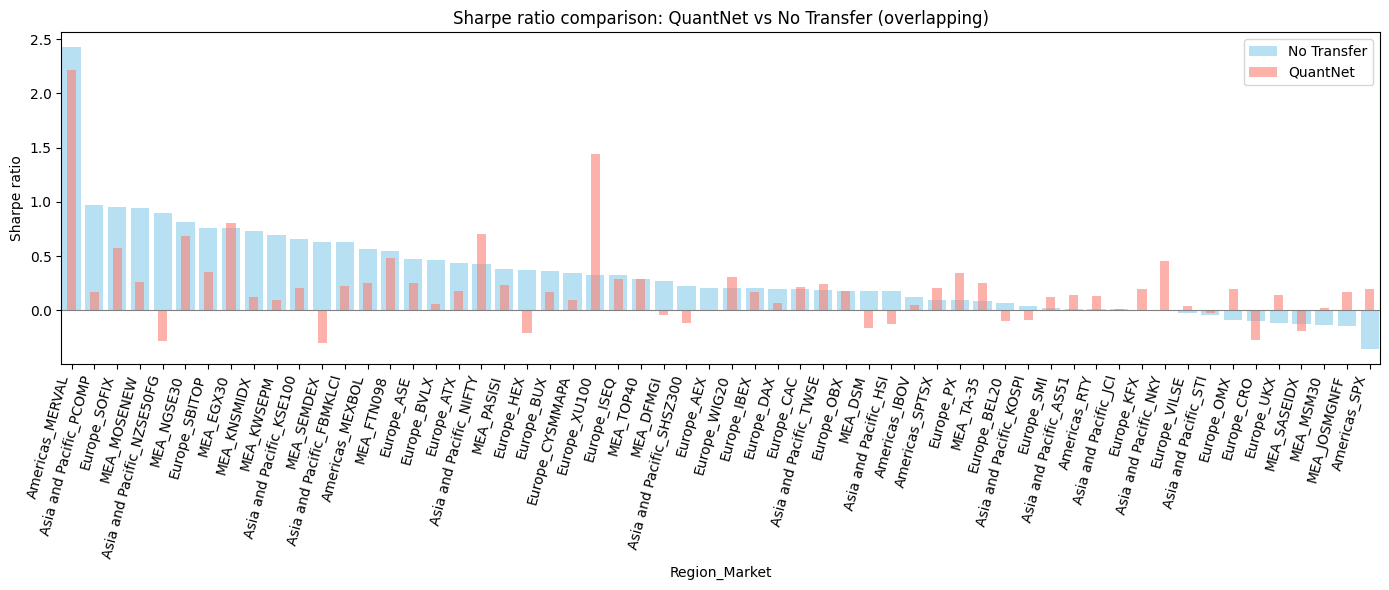

In [12]:
chart_2 = grouped_df_test[["exchange", "transferstrat", "SR"]]

chart_2 = chart_2.copy()

chart_2["transferstrat"] = chart_2["transferstrat"].replace(
    {"1000_global_lstm_lstm": "QuantNet", "1000_no_transfer_linear": "No Transfer"}
)

# Pivot to wide format
pivot_df = chart_2.pivot(index="exchange", columns="transferstrat", values="SR")

# Sort by "No Transfer"
pivot_df = pivot_df.sort_values(by="No Transfer", ascending=False)

# Plot overlapping bars
fig, ax = plt.subplots(figsize=(14, 6))

pivot_df["No Transfer"].plot(
    kind="bar", color="skyblue", alpha=0.6, width=0.8, ax=ax, label="No Transfer"
)

pivot_df["QuantNet"].plot(
    kind="bar",
    color="salmon",
    alpha=0.6,
    width=0.4,  # thinner bar so both visible
    ax=ax,
    label="QuantNet",
)

# Labels and formatting
plt.ylabel("Sharpe ratio")
plt.xlabel("Region_Market")
plt.title("Sharpe ratio comparison: QuantNet vs No Transfer (overlapping)")
plt.axhline(0, color="gray", linewidth=0.8)

plt.xticks(rotation=75, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
fig.savefig("chart_2.png")

### Chart 3

In [14]:
chart_3 = grouped_df_test[["exchange", "transferstrat", "SR", "CR"]]
chart_3

,exchange,transferstrat,SR,CR
0,Americas_IBOV,1000_global_linear_linear,-0.074534,-0.079178
1,Americas_IBOV,1000_global_linear_lstm,0.306446,0.296239
2,Americas_IBOV,1000_global_lstm_linear,0.109698,0.227985
3,Americas_IBOV,1000_global_lstm_lstm,0.047518,0.049693
4,Americas_IBOV,1000_no_transfer_linear,0.122657,0.142232
...,...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215,0.062002
1388,MEA_TOP40,500_global_lstm_linear,0.421034,0.441096
1389,MEA_TOP40,500_global_lstm_lstm,0.285554,0.234425
1390,MEA_TOP40,500_no_transfer_linear,0.348245,0.345028


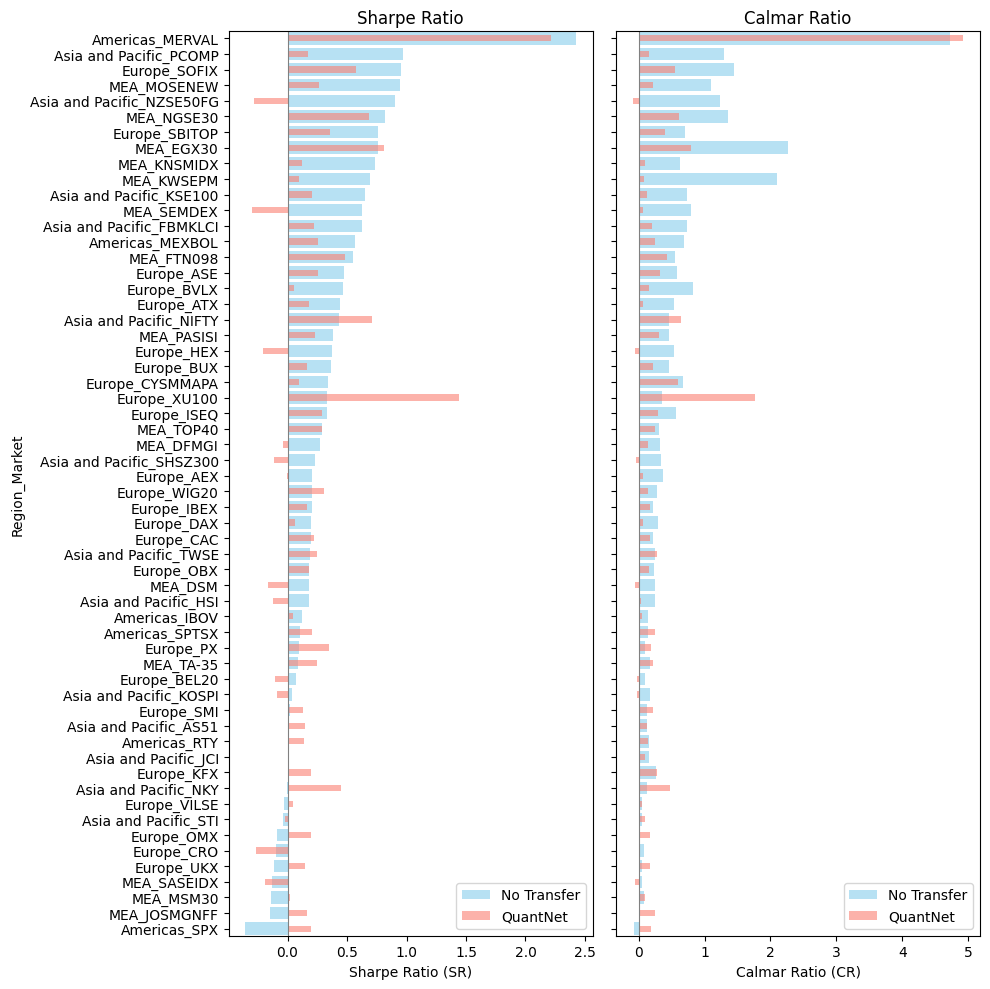

In [15]:
import matplotlib.pyplot as plt

# Take needed columns
chart_3 = grouped_df_test[["exchange", "transferstrat", "SR", "CR"]].copy()

# Replace strategy names
chart_3["transferstrat"] = chart_3["transferstrat"].replace(
    {"1000_global_lstm_lstm": "QuantNet", "1000_no_transfer_linear": "No Transfer"}
)

# Pivot for SR and CR
pivot_SR = chart_3.pivot(index="exchange", columns="transferstrat", values="SR")
pivot_CR = chart_3.pivot(index="exchange", columns="transferstrat", values="CR")

# Sort by SR (No Transfer) to keep order consistent
order = pivot_SR.sort_values(by="No Transfer", ascending=True).index
pivot_SR = pivot_SR.loc[order]
pivot_CR = pivot_CR.loc[order]

# Create 2 subplots side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 10), sharey=True)

# --- Left plot: SR ---
pivot_SR["No Transfer"].plot(
    kind="barh", ax=axes[0], color="skyblue", alpha=0.6, width=0.8, label="No Transfer"
)
pivot_SR["QuantNet"].plot(
    kind="barh", ax=axes[0], color="salmon", alpha=0.6, width=0.4, label="QuantNet"
)
axes[0].set_xlabel("Sharpe Ratio (SR)")
axes[0].set_ylabel("Region_Market")
axes[0].set_title("Sharpe Ratio")
axes[0].axvline(0, color="gray", linewidth=0.8)
axes[0].legend()

# --- Right plot: CR ---
pivot_CR["No Transfer"].plot(
    kind="barh", ax=axes[1], color="skyblue", alpha=0.6, width=0.8, label="No Transfer"
)
pivot_CR["QuantNet"].plot(
    kind="barh", ax=axes[1], color="salmon", alpha=0.6, width=0.4, label="QuantNet"
)
axes[1].set_xlabel("Calmar Ratio (CR)")
axes[1].set_title("Calmar Ratio")
axes[1].axvline(0, color="gray", linewidth=0.8)
axes[1].legend()

plt.tight_layout()
plt.show()

In [16]:
fig.savefig("chart_3.png")

### Chart 4

In [17]:
df["exchange"].unique()

array(['Americas_IBOV', 'Americas_MEXBOL', 'Americas_MERVAL',
       'Americas_SPTSX', 'Americas_SPX', 'Americas_RTY',
       'Asia and Pacific_AS51', 'Asia and Pacific_FBMKLCI',
       'Asia and Pacific_HSI', 'Asia and Pacific_JCI',
       'Asia and Pacific_KOSPI', 'Asia and Pacific_KSE100',
       'Asia and Pacific_NIFTY', 'Asia and Pacific_NKY',
       'Asia and Pacific_NZSE50FG', 'Asia and Pacific_PCOMP',
       'Asia and Pacific_STI', 'Asia and Pacific_SHSZ300',
       'Asia and Pacific_TWSE', 'Europe_AEX', 'Europe_ASE', 'Europe_ATX',
       'Europe_BEL20', 'Europe_BUX', 'Europe_BVLX', 'Europe_CAC',
       'Europe_CYSMMAPA', 'Europe_DAX', 'Europe_HEX', 'Europe_IBEX',
       'Europe_ISEQ', 'Europe_KFX', 'Europe_OBX', 'Europe_OMX',
       'Europe_SMI', 'Europe_UKX', 'Europe_VILSE', 'Europe_WIG20',
       'Europe_XU100', 'Europe_SOFIX', 'Europe_SBITOP', 'Europe_PX',
       'Europe_CRO', 'MEA_DFMGI', 'MEA_DSM', 'MEA_EGX30', 'MEA_FTN098',
       'MEA_JOSMGNFF', 'MEA_KNSMIDX', 'MEA_KWSE

In [18]:
exchange_to_country = {
    # Americas
    "Americas_IBOV": "Brazil",
    "Americas_MEXBOL": "Mexico",
    "Americas_MERVAL": "Argentina",
    "Americas_SPTSX": "Canada",
    "Americas_SPX": "United States",
    "Americas_RTY": "United States",
    # Asia and Pacific
    "Asia and Pacific_AS51": "Australia",
    "Asia and Pacific_FBMKLCI": "Malaysia",
    "Asia and Pacific_HSI": "Hong Kong",
    "Asia and Pacific_JCI": "Indonesia",
    "Asia and Pacific_KOSPI": "South Korea",
    "Asia and Pacific_KSE100": "Pakistan",
    "Asia and Pacific_NIFTY": "India",
    "Asia and Pacific_NKY": "Japan",
    "Asia and Pacific_NZSE50FG": "New Zealand",
    "Asia and Pacific_PCOMP": "Philippines",
    "Asia and Pacific_STI": "Singapore",
    "Asia and Pacific_SHSZ300": "China",
    "Asia and Pacific_TWSE": "Taiwan",
    # Europe
    "Europe_AEX": "Netherlands",
    "Europe_ASE": "Greece",
    "Europe_ATX": "Austria",
    "Europe_BEL20": "Belgium",
    "Europe_BUX": "Hungary",
    "Europe_BVLX": "Portugal",
    "Europe_CAC": "France",
    "Europe_CYSMMAPA": "Cyprus",
    "Europe_DAX": "Germany",
    "Europe_HEX": "Finland",
    "Europe_IBEX": "Spain",
    "Europe_ISEQ": "Ireland",
    "Europe_KFX": "Denmark",
    "Europe_OBX": "Norway",
    "Europe_OMX": "Sweden",
    "Europe_SMI": "Switzerland",
    "Europe_UKX": "United Kingdom",
    "Europe_VILSE": "Lithuania",
    "Europe_WIG20": "Poland",
    "Europe_XU100": "Türkiye",
    "Europe_SOFIX": "Bulgaria",
    "Europe_SBITOP": "Slovenia",
    "Europe_PX": "Czech Republic",
    "Europe_CRO": "Croatia",
    # Middle East & Africa (MEA)
    "MEA_DFMGI": "United Arab Emirates",
    "MEA_DSM": "Qatar",
    "MEA_EGX30": "Egypt",
    "MEA_FTN098": "South Africa",
    "MEA_JOSMGNFF": "Jordan",
    "MEA_KNSMIDX": "Kenya",
    "MEA_KWSEPM": "Kuwait",
    "MEA_MOSENEW": "Morocco",
    "MEA_MSM30": "Oman",
    "MEA_NGSE30": "Nigeria",
    "MEA_PASISI": "Palestine",
    "MEA_SASEIDX": "Saudi Arabia",
    "MEA_SEMDEX": "Mauritius",
    "MEA_TA-35": "Israel",
    "MEA_TOP40": "South Africa",
}

In [19]:
df["country"] = df["exchange"].map(exchange_to_country)

In [20]:
def calculate_chart_4(df: pd.DataFrame) -> pd.DataFrame:
    # Pivot để có SR_Q (QuantNet) và SR_N (No Transfer) cho từng asset trong region
    df_wide = df.pivot_table(
        index=["country"], columns="transferstrat", values="SR", aggfunc=list
    ).reset_index()

    # Đặt tên cột
    df_wide = df_wide.rename(
        columns={"1000_global_lstm_lstm": "SR_Q", "1000_no_transfer_linear": "SR_N"}
    )

    # Chuyển list -> từng dòng (explode) để mỗi asset là một dòng
    df_exploded = df_wide.explode(["SR_Q", "SR_N"]).reset_index(drop=True)

    # Tính relative difference (%) cho từng asset
    df_exploded["relative_diff_%"] = (
        (df_exploded["SR_Q"] - df_exploded["SR_N"]) / df_exploded["SR_N"].abs()
    ) * 100

    # Tính average theo region
    df_avg = df_exploded.groupby("country", as_index=False)["relative_diff_%"].mean()

    return df_avg

In [21]:
chart_4_df = calculate_chart_4(df)
chart_4_df

,country,relative_diff_%
0,Argentina,-29.517745
1,Australia,-43.520619
2,Austria,-30.507098
3,Belgium,209.432765
4,Brazil,591.056994
5,Bulgaria,-49.152606
6,Canada,-28.461142
7,China,-70.124663
8,Croatia,-69.60611
9,Cyprus,1.157049


In [22]:
min_relative_diff = round(chart_4_df["relative_diff_%"].min(), 3)
max_relative_diff = round(chart_4_df["relative_diff_%"].max(), 3)
min_relative_diff, max_relative_diff

(-615.095, 591.057)

In [23]:
import pandas as pd
import plotly.express as px
import pycountry
import plotly.io as pio

# ✅ Set renderer for VS Code Jupyter
pio.renderers.default = "vscode"

# Define countries belonging to each region
region_map = {
    "Europe": [
        "Albania",
        "Andorra",
        "Armenia",
        "Austria",
        "Azerbaijan",
        "Belarus",
        "Belgium",
        "Bosnia and Herzegovina",
        "Bulgaria",
        "Croatia",
        "Cyprus",
        "Czechia",
        "Denmark",
        "Estonia",
        "Finland",
        "France",
        "Georgia",
        "Germany",
        "Greece",
        "Hungary",
        "Iceland",
        "Ireland",
        "Italy",
        "Kazakhstan",
        "Latvia",
        "Liechtenstein",
        "Lithuania",
        "Luxembourg",
        "Malta",
        "Moldova",
        "Monaco",
        "Montenegro",
        "Netherlands",
        "North Macedonia",
        "Norway",
        "Poland",
        "Portugal",
        "Romania",
        "Russia",
        "San Marino",
        "Serbia",
        "Slovakia",
        "Slovenia",
        "Spain",
        "Sweden",
        "Switzerland",
        "Ukraine",
        "United Kingdom",
        "Vatican City",
        # Kosovo missing in pycountry, handle manually if needed
    ],
    "Americas": [
        "Antigua and Barbuda",
        "Argentina",
        "Bahamas",
        "Barbados",
        "Belize",
        "Bolivia",
        "Brazil",
        "Canada",
        "Chile",
        "Colombia",
        "Costa Rica",
        "Cuba",
        "Dominica",
        "Dominican Republic",
        "Ecuador",
        "El Salvador",
        "Grenada",
        "Guatemala",
        "Guyana",
        "Haiti",
        "Honduras",
        "Jamaica",
        "Mexico",
        "Nicaragua",
        "Panama",
        "Paraguay",
        "Peru",
        "Saint Kitts and Nevis",
        "Saint Lucia",
        "Saint Vincent and the Grenadines",
        "Suriname",
        "Trinidad and Tobago",
        "United States",
        "Uruguay",
        "Venezuela",
    ],
    # If you want MEA instead of separate Africa + Middle East
    "MEA": [
        # --- Africa ---
        "Algeria",
        "Angola",
        "Benin",
        "Botswana",
        "Burkina Faso",
        "Burundi",
        "Cabo Verde",
        "Cameroon",
        "Central African Republic",
        "Chad",
        "Comoros",
        "Congo",
        "Democratic Republic of the Congo",
        "Djibouti",
        "Egypt",
        "Equatorial Guinea",
        "Eritrea",
        "Eswatini",
        "Ethiopia",
        "Gabon",
        "Gambia",
        "Ghana",
        "Guinea",
        "Guinea-Bissau",
        "Côte d'Ivoire",
        "Kenya",
        "Lesotho",
        "Liberia",
        "Libya",
        "Madagascar",
        "Malawi",
        "Mali",
        "Mauritania",
        "Mauritius",
        "Morocco",
        "Mozambique",
        "Namibia",
        "Niger",
        "Nigeria",
        "Rwanda",
        "Sao Tome and Principe",
        "Senegal",
        "Seychelles",
        "Sierra Leone",
        "Somalia",
        "South Africa",
        "South Sudan",
        "Sudan",
        "Tanzania",
        "Togo",
        "Tunisia",
        "Uganda",
        "Zambia",
        "Zimbabwe",
        # --- Middle East ---
        "Bahrain",
        "Iran",
        "Iraq",
        "Israel",
        "Jordan",
        "Kuwait",
        "Lebanon",
        "Oman",
        "Palestine",
        "Qatar",
        "Saudi Arabia",
        "Syria",
        "Turkey",
        "United Arab Emirates",
        "Yemen",
    ],
    "Asia-Pacific": [
        "Afghanistan",
        "Bangladesh",
        "Bhutan",
        "Brunei",
        "Cambodia",
        "China",
        "East Timor",
        "India",
        "Indonesia",
        "Japan",
        "Kyrgyzstan",
        "Laos",
        "Malaysia",
        "Maldives",
        "Mongolia",
        "Myanmar",
        "Nepal",
        "North Korea",
        "Pakistan",
        "Philippines",
        "Singapore",
        "South Korea",
        "Sri Lanka",
        "Taiwan",
        "Tajikistan",
        "Thailand",
        "Turkmenistan",
        "Uzbekistan",
        "Vietnam",
        # Middle Eastern states excluded (now in MEA)
    ],
    "Oceania": [
        "Australia",
        "Fiji",
        "Kiribati",
        "Marshall Islands",
        "Micronesia",
        "Nauru",
        "New Zealand",
        "Palau",
        "Papua New Guinea",
        "Samoa",
        "Solomon Islands",
        "Tonga",
        "Tuvalu",
        "Vanuatu",
    ],
}


# ✅ Convert country names to ISO-3 codes
def name_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None


chart_4_df["iso_alpha"] = chart_4_df["country"].apply(name_to_iso3)

# Define bins and labels
bins = [min_relative_diff, -100, -50, 0, 50, 100, max_relative_diff]
labels = [
    f"{min_relative_diff} – -100",
    "-100 – -50",
    "-50 – 0",
    "0 – 50",
    "50 – 100",
    f"100 – {max_relative_diff}",
]

# Apply pd.cut with custom labels
chart_4_df["metric_bin_str"] = pd.cut(
    chart_4_df["relative_diff_%"],
    bins=bins,
    labels=labels,
    include_lowest=True,
)

# ✅ Ensure categorical order matches labels
chart_4_df["metric_bin_str"] = pd.Categorical(
    chart_4_df["metric_bin_str"], categories=labels, ordered=True
)

# Plot world map
fig = px.choropleth(
    chart_4_df,
    locations="iso_alpha",
    locationmode="ISO-3",
    color="metric_bin_str",
    hover_name="country",
    title="World Map Colored by Metric Bins",
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig.update_layout(
    width=1400,  # increase width
    height=800,  # increase height
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
)

fig.show()

In [24]:
fig.write_image("chart_4.png", width=1400, height=800, scale=2)

### Table A4

In [25]:
df

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat,country
0,ABEV3 BS Equity,1.814130,2.151492,-0.291257,0.626638,0.291852,2.882295,0.183693,-0.034001,1.280420,0.155603,5.892951,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
1,BBAS3 BS Equity,1.962926,2.432544,-0.450468,1.095783,0.422541,3.230043,0.256782,-0.034001,1.280420,0.505638,5.188526,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
2,BBDC3 BS Equity,2.060505,2.474347,-0.372608,0.921962,0.346382,3.364621,0.212126,-0.034001,1.280420,0.432445,4.304384,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
3,BBDC4 BS Equity,2.008947,2.729678,-0.335485,0.915766,0.355081,3.309779,0.215525,-0.034001,1.280420,0.626201,5.328971,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
4,BRAP4 BS Equity,2.450775,3.759866,-0.414846,1.559767,0.420061,4.052500,0.254035,-0.034001,1.280420,0.182148,4.892425,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,SOL SJ Equity,0.043386,0.022420,-0.016510,0.000370,0.009588,0.061114,0.006806,-0.001096,1.128141,0.176572,9.699691,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212396,SPP SJ Equity,0.310746,0.246750,-0.020567,0.005075,0.016740,0.490055,0.010615,-0.001096,1.128141,2.499652,41.673329,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212397,TBS SJ Equity,-0.063373,-0.053357,-0.016728,-0.000893,0.012799,-0.086793,0.009345,-0.001096,1.128141,-1.081780,22.363524,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212398,TFG SJ Equity,0.612362,0.657872,-0.019217,0.012642,0.020869,1.255329,0.010180,-0.001096,1.128141,7.603496,126.320521,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa


In [26]:
raw_table_a4 = df[
    df["transferstrat"].isin(["1000_global_lstm_lstm", "1000_no_transfer_linear"])
]
raw_table_a4

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat,country
9135,ABEV3 BS Equity,0.600777,0.266487,-0.451258,0.120254,0.235000,0.887007,0.159167,-0.016919,1.101769,0.058166,5.646318,Americas_IBOV,Americas,train,1000_global_lstm_lstm,Brazil
9136,BBAS3 BS Equity,0.475605,0.213882,-0.368554,0.078827,0.202658,0.708238,0.136091,-0.016919,1.101769,0.214768,5.201412,Americas_IBOV,Americas,train,1000_global_lstm_lstm,Brazil
9137,BBDC3 BS Equity,0.541220,0.247713,-0.403522,0.099957,0.221091,0.809905,0.147744,-0.016919,1.101769,0.314179,4.289333,Americas_IBOV,Americas,train,1000_global_lstm_lstm,Brazil
9138,BBDC4 BS Equity,0.521061,0.256196,-0.364390,0.093355,0.215871,0.781413,0.143947,-0.016919,1.101769,0.410889,5.337738,Americas_IBOV,Americas,train,1000_global_lstm_lstm,Brazil
9139,BRAP4 BS Equity,0.448548,0.097600,-0.587034,0.057295,0.148940,0.658073,0.101519,-0.016919,1.101769,0.046064,4.883230,Americas_IBOV,Americas,train,1000_global_lstm_lstm,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,SOL SJ Equity,-0.119102,-0.067129,-0.005495,-0.000369,0.003059,-0.178341,0.002043,-0.000380,1.074798,0.696184,7.409046,MEA_TOP40,MEA,test,1000_no_transfer_linear,South Africa
194669,SPP SJ Equity,-0.309908,-0.206208,-0.018136,-0.003740,0.011862,-0.370599,0.009920,-0.000380,1.074798,-5.997862,94.942231,MEA_TOP40,MEA,test,1000_no_transfer_linear,South Africa
194670,TBS SJ Equity,0.333911,0.148464,-0.012101,0.001797,0.005420,0.482761,0.003749,-0.000380,1.074798,0.386022,23.547542,MEA_TOP40,MEA,test,1000_no_transfer_linear,South Africa
194671,TFG SJ Equity,0.624152,0.452211,-0.008798,0.003979,0.006395,0.978886,0.004077,-0.000380,1.074798,2.410440,41.881184,MEA_TOP40,MEA,test,1000_no_transfer_linear,South Africa


In [27]:
raw_table_a4.notnull()

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat,country
9135,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9136,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9137,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9138,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9139,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
194669,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
194670,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
194671,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [28]:
from typing import Callable, List, Dict
from utils import *


def add_metric_column_for_df(
    df: pd.DataFrame,
    group_by_column: List[str],
    column_to_apply_metric: List[str],
    func_dict: Dict[str, Callable],
):
    """
    Aggregates multiple metrics for specified columns grouped by a column,
    with column names in the format metric_column (e.g., median_SR).
    """
    # Prepare agg dict: each column maps to list of functions
    agg_dict = {col: list(func_dict.values()) for col in column_to_apply_metric}

    # Group and aggregate
    grouped = df.groupby(group_by_column).agg(agg_dict)

    # Flatten MultiIndex columns in metric_column format
    func_names = list(func_dict.keys())
    new_columns = []
    for col in column_to_apply_metric:
        for name in func_names:
            new_columns.append(f"{name}_{col}")
    grouped.columns = new_columns

    # Reset index
    grouped = grouped.reset_index()
    return grouped

In [29]:
columns_to_analyze = [
    "SR",
    "CR",
    "MDD",
    "ANN_RET",
    "ANN_VOL",
    "SortR",
    "DownRisk",
    "VaR",
    "TailR",
    "Skew",
    "Kurt",
]

func_dict = {
    "median": pd.Series.median,
    "mad": mad,
    "mean": pd.Series.mean,
    "sd": pd.Series.std,
}

table_a4 = add_metric_column_for_df(
    df=df,
    group_by_column=["exchange", "transferstrat"],
    column_to_apply_metric=columns_to_analyze,
    func_dict=func_dict,
)
table_a4

,exchange,transferstrat,median_SR,mad_SR,mean_SR,sd_SR,median_CR,mad_CR,mean_CR,sd_CR,...,mean_TailR,sd_TailR,median_Skew,mad_Skew,mean_Skew,sd_Skew,median_Kurt,mad_Kurt,mean_Kurt,sd_Kurt
0,Americas_IBOV,1000_global_linear_linear,1.855669,0.867166,1.326272,0.987504,2.034005,1.130248,1.671612,1.313471,...,1.194578,0.122102,0.448834,0.418373,0.491675,0.611146,5.515468,4.308569,7.557013,6.468268
1,Americas_IBOV,1000_global_linear_lstm,2.483840,1.090730,2.061815,1.279042,2.416565,1.650099,2.497545,2.032875,...,1.762404,0.473930,2.296671,1.190151,1.781589,1.634724,17.427708,8.460270,21.422173,13.567647
2,Americas_IBOV,1000_global_lstm_linear,1.816558,0.848388,1.469196,1.042568,1.334977,1.000997,1.529895,1.290473,...,1.312693,0.240756,1.140038,0.815530,1.074812,1.081984,12.018020,11.114626,17.710002,16.705960
3,Americas_IBOV,1000_global_lstm_lstm,0.434496,0.240438,0.328242,0.341023,0.129376,0.142259,0.125498,0.218891,...,1.067652,0.047586,0.198666,0.350730,0.228641,0.534974,5.544739,4.099084,7.359876,6.236579
4,Americas_IBOV,1000_no_transfer_linear,1.262362,0.536620,0.989504,0.651008,0.761346,0.419200,0.722283,0.524566,...,1.246998,0.156011,2.899750,1.569687,2.394743,2.058014,42.635382,18.287579,43.897506,23.416739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,2.150288,1.129134,1.590981,1.255738,1.679700,1.361244,1.795870,1.621709,...,1.467262,0.346016,1.534109,1.250362,1.377043,1.917877,14.718570,16.618281,24.109354,31.366246
1388,MEA_TOP40,500_global_lstm_linear,1.780067,0.766958,1.450615,0.895203,1.408765,0.793912,1.320549,0.970024,...,1.288542,0.171850,0.780286,0.705307,0.799779,1.346070,8.566629,11.148340,15.117928,21.993476
1389,MEA_TOP40,500_global_lstm_lstm,0.439124,0.201176,0.407511,0.287269,0.169938,0.150140,0.191759,0.244018,...,1.062665,0.023060,0.133647,0.811534,0.319466,2.208296,4.950960,27.919152,21.895719,63.502031
1390,MEA_TOP40,500_no_transfer_linear,1.324436,0.509860,1.097334,0.621114,0.793729,0.437349,0.825309,0.574974,...,1.304046,0.157468,2.695704,1.994470,2.337296,2.955598,41.129724,29.428262,50.515487,49.860956


In [30]:
table_a4 = table_a4[
    table_a4["exchange"].isin(
        ["Americas_SPX", "Asia and Pacific_KOSPI", "Europe_UKX", "MEA_SASEIDX"]
    )
]
table_a4 = table_a4[
    table_a4["transferstrat"].isin(["1000_global_lstm_lstm", "1000_no_transfer_linear"])
]
table_a4.loc[
    table_a4["transferstrat"] == "1000_no_transfer_linear", "transferstrat"
] = "No Transfer"
table_a4.loc[table_a4["transferstrat"] == "1000_global_lstm_lstm", "transferstrat"] = (
    "QuantNet"
)
table_a4.reset_index(drop=True, inplace=True)
table_a4

,exchange,transferstrat,median_SR,mad_SR,mean_SR,sd_SR,median_CR,mad_CR,mean_CR,sd_CR,...,mean_TailR,sd_TailR,median_Skew,mad_Skew,mean_Skew,sd_Skew,median_Kurt,mad_Kurt,mean_Kurt,sd_Kurt
0,Americas_SPX,QuantNet,0.376558,0.224203,0.351235,0.320633,0.125460,0.151778,0.164641,0.255638,...,1.037517,0.021844,0.127236,0.500116,0.137302,0.951159,10.242092,10.671717,15.398347,19.862473
1,Americas_SPX,No Transfer,3.886275,1.911205,2.549206,2.064438,3.369844,2.303406,3.117299,2.670854,...,2.145921,0.866978,2.119084,1.345717,1.397166,1.810654,13.202850,9.122526,18.167882,19.839024
2,Asia and Pacific_KOSPI,QuantNet,0.341562,0.264135,0.223855,0.364260,0.107013,0.132410,0.077374,0.226834,...,1.098197,0.044885,0.801015,0.853418,1.067615,2.692007,8.473893,20.309891,20.035857,147.449022
3,Asia and Pacific_KOSPI,No Transfer,3.501397,1.584096,2.429962,1.724018,2.799208,1.764096,2.568084,2.071969,...,1.928254,0.651670,1.928217,1.375462,1.568316,2.678783,15.212560,21.903469,28.848836,50.760106
4,Europe_UKX,QuantNet,0.272793,0.234764,0.252353,0.332219,0.082200,0.143888,0.121591,0.231001,...,1.026021,0.043038,0.110514,1.023244,0.557885,3.968377,8.032021,52.005098,37.615043,224.371087
5,Europe_UKX,No Transfer,1.749452,0.884766,1.223922,1.009414,1.124580,0.662050,0.995656,0.787496,...,1.405011,0.305732,2.887605,1.961057,2.323813,3.184322,36.503635,19.206310,42.794678,51.033243
6,MEA_SASEIDX,QuantNet,0.353173,0.305924,0.201791,0.405129,0.083051,0.118483,0.049506,0.173757,...,1.114371,0.055178,0.497749,0.945765,0.806273,1.851033,19.855981,27.268067,32.221161,62.562275
7,MEA_SASEIDX,No Transfer,1.730077,0.843700,1.189702,0.970806,1.464833,0.779996,1.212761,0.915792,...,1.520366,0.367019,4.065507,2.224070,2.985241,2.825859,44.685642,12.455775,44.865148,18.487653


In [31]:
def draw_table(df: pd.DataFrame, upper_prefix: str, lower_prefix: str) -> plt.Figure:
    strategies = sorted(
        {c.split("_", 1)[1] for c in df.columns if c.startswith(f"{upper_prefix}_")}
    )

    # Build rows
    rows = []
    for metric, r in df.iterrows():
        row = []
        row.append(r["exchange"])
        row.append(r["transferstrat"])
        for strat in strategies:
            mean_val = r[f"{upper_prefix}_{strat}"]
            se_val = r[f"{lower_prefix}_{strat}"]
            row.append(f"{mean_val:.6f}\n({se_val:.5f})")
        rows.append(row)

    # Column headers
    columns = ["exchange", "transferstrat"] + strategies

    # Create figure
    fig, ax = plt.subplots(figsize=(18, 3))
    ax.axis("off")

    # Draw table
    table = ax.table(cellText=rows, colLabels=columns, cellLoc="center", loc="center")

    # Style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.3, 1.3)

    # Adjust row heights for multi-line text
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_facecolor("#d0d6e0")
            cell.set_text_props(weight="bold")
            cell.set_height(0.25)
        else:
            cell.set_height(0.35)

    return fig

In [32]:
table_a4_a = table_a4.loc[:, table_a4.columns.str.startswith(("mean", "sd"))].copy()

# Add columns safely
table_a4_a.loc[:, "exchange"] = table_a4["exchange"].values
table_a4_a.loc[:, "transferstrat"] = table_a4["transferstrat"].values
table_a4_a = table_a4_a.reset_index(drop=True)
table_a4_a

,mean_SR,sd_SR,mean_CR,sd_CR,mean_MDD,sd_MDD,mean_ANN_RET,sd_ANN_RET,mean_ANN_VOL,sd_ANN_VOL,...,mean_VaR,sd_VaR,mean_TailR,sd_TailR,mean_Skew,sd_Skew,mean_Kurt,sd_Kurt,exchange,transferstrat
0,0.351235,0.320633,0.164641,0.255638,-0.308470,0.144739,0.044934,0.056579,0.134551,0.058916,...,-0.012883,0.000461,1.037517,0.021844,0.137302,0.951159,15.398347,19.862473,Americas_SPX,QuantNet
1,2.549206,2.064438,3.117299,2.670854,-0.005577,0.005892,0.009743,0.007978,0.003760,0.002115,...,-0.000228,0.000059,2.145921,0.866978,1.397166,1.810654,18.167882,19.839024,Americas_SPX,No Transfer
2,0.223855,0.364260,0.077374,0.226834,-0.442213,0.161043,0.039000,0.074915,0.213380,0.072028,...,-0.019223,0.001451,1.098197,0.044885,1.067615,2.692007,20.035857,147.449022,Asia and Pacific_KOSPI,QuantNet
3,2.429962,1.724018,2.568084,2.071969,-0.011732,0.007350,0.021292,0.015246,0.008485,0.002307,...,-0.000504,0.000058,1.928254,0.651670,1.568316,2.678783,28.848836,50.760106,Asia and Pacific_KOSPI,No Transfer
4,0.252353,0.332219,0.121591,0.231001,-0.240386,0.157932,0.023153,0.042099,0.094757,0.057886,...,-0.009918,0.000103,1.026021,0.043038,0.557885,3.968377,37.615043,224.371087,Europe_UKX,QuantNet
5,1.223922,1.009414,0.995656,0.787496,-0.006753,0.002989,0.006004,0.004872,0.004292,0.001075,...,-0.000267,0.000005,1.405011,0.305732,2.323813,3.184322,42.794678,51.033243,Europe_UKX,No Transfer
6,0.201791,0.405129,0.049506,0.173757,-0.356102,0.159450,0.025041,0.044762,0.118017,0.042836,...,-0.009709,0.000394,1.114371,0.055178,0.806273,1.851033,32.221161,62.562275,MEA_SASEIDX,QuantNet
7,1.189702,0.970806,1.212761,0.915792,-0.006320,0.003023,0.006195,0.005000,0.004609,0.001368,...,-0.000222,0.000020,1.520366,0.367019,2.985241,2.825859,44.865148,18.487653,MEA_SASEIDX,No Transfer


In [33]:
table_a4_a.to_csv("table_a4_a.csv")

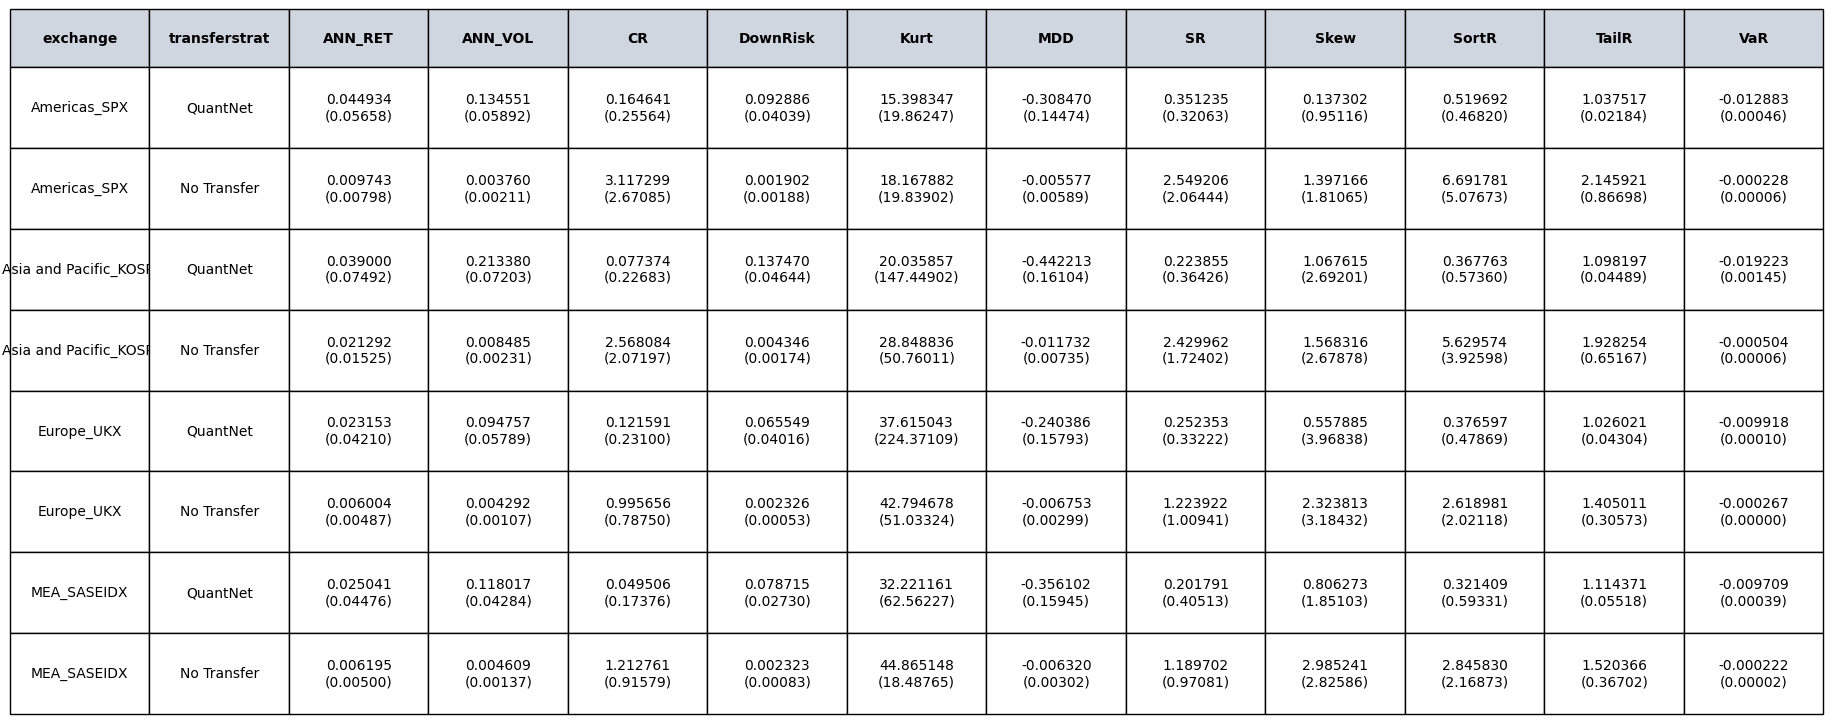

In [34]:
fig_a = draw_table(df=table_a4_a, upper_prefix="mean", lower_prefix="sd")

In [35]:
table_a4_b = table_a4.loc[:, table_a4.columns.str.startswith(("median", "mad"))].copy()

# Add columns safely
table_a4_b.loc[:, "exchange"] = table_a4["exchange"].values
table_a4_b.loc[:, "transferstrat"] = table_a4["transferstrat"].values
table_a4_b = table_a4_b.reset_index(drop=True)
table_a4_b

,median_SR,mad_SR,median_CR,mad_CR,median_MDD,mad_MDD,median_ANN_RET,mad_ANN_RET,median_ANN_VOL,mad_ANN_VOL,...,median_VaR,mad_VaR,median_TailR,mad_TailR,median_Skew,mad_Skew,median_Kurt,mad_Kurt,exchange,transferstrat
0,0.376558,0.224203,0.125460,0.151778,-0.309218,0.120035,0.038482,0.040937,0.132005,0.046931,...,-0.013208,0.000435,1.052930,0.020585,0.127236,0.500116,10.242092,10.671717,Americas_SPX,QuantNet
1,3.886275,1.911205,3.369844,2.303406,-0.004219,0.002957,0.014634,0.007397,0.003791,0.000482,...,-0.000186,0.000056,2.758677,0.817008,2.119084,1.345717,13.202850,9.122526,Americas_SPX,No Transfer
2,0.341562,0.264135,0.107013,0.132410,-0.460277,0.132132,0.048361,0.053366,0.216380,0.057711,...,-0.020245,0.001368,1.129713,0.042294,0.801015,0.853418,8.473893,20.309891,Asia and Pacific_KOSPI,QuantNet
3,3.501397,1.584096,2.799208,1.764096,-0.009485,0.005083,0.030067,0.013958,0.008541,0.001161,...,-0.000463,0.000054,2.388795,0.614055,1.928217,1.375462,15.212560,21.903469,Asia and Pacific_KOSPI,No Transfer
4,0.272793,0.234764,0.082200,0.143888,-0.218123,0.133783,0.017547,0.029153,0.093021,0.045860,...,-0.009990,0.000097,1.056273,0.040469,0.110514,1.023244,8.032021,52.005098,Europe_UKX,QuantNet
5,1.749452,0.884766,1.124580,0.662050,-0.006074,0.002204,0.008201,0.004299,0.004624,0.000819,...,-0.000264,0.000004,1.620624,0.287483,2.887605,1.961057,36.503635,19.206310,Europe_UKX,No Transfer
6,0.353173,0.305924,0.083051,0.118483,-0.371459,0.134860,0.035379,0.034378,0.119939,0.032202,...,-0.009986,0.000370,1.152995,0.051900,0.497749,0.945765,19.855981,27.268067,MEA_SASEIDX,QuantNet
7,1.730077,0.843700,1.464833,0.779996,-0.005619,0.001985,0.008696,0.004464,0.005077,0.000980,...,-0.000208,0.000019,1.779278,0.345215,4.065507,2.224070,44.685642,12.455775,MEA_SASEIDX,No Transfer


In [36]:
table_a4_b.to_csv("table_a4_b.csv")

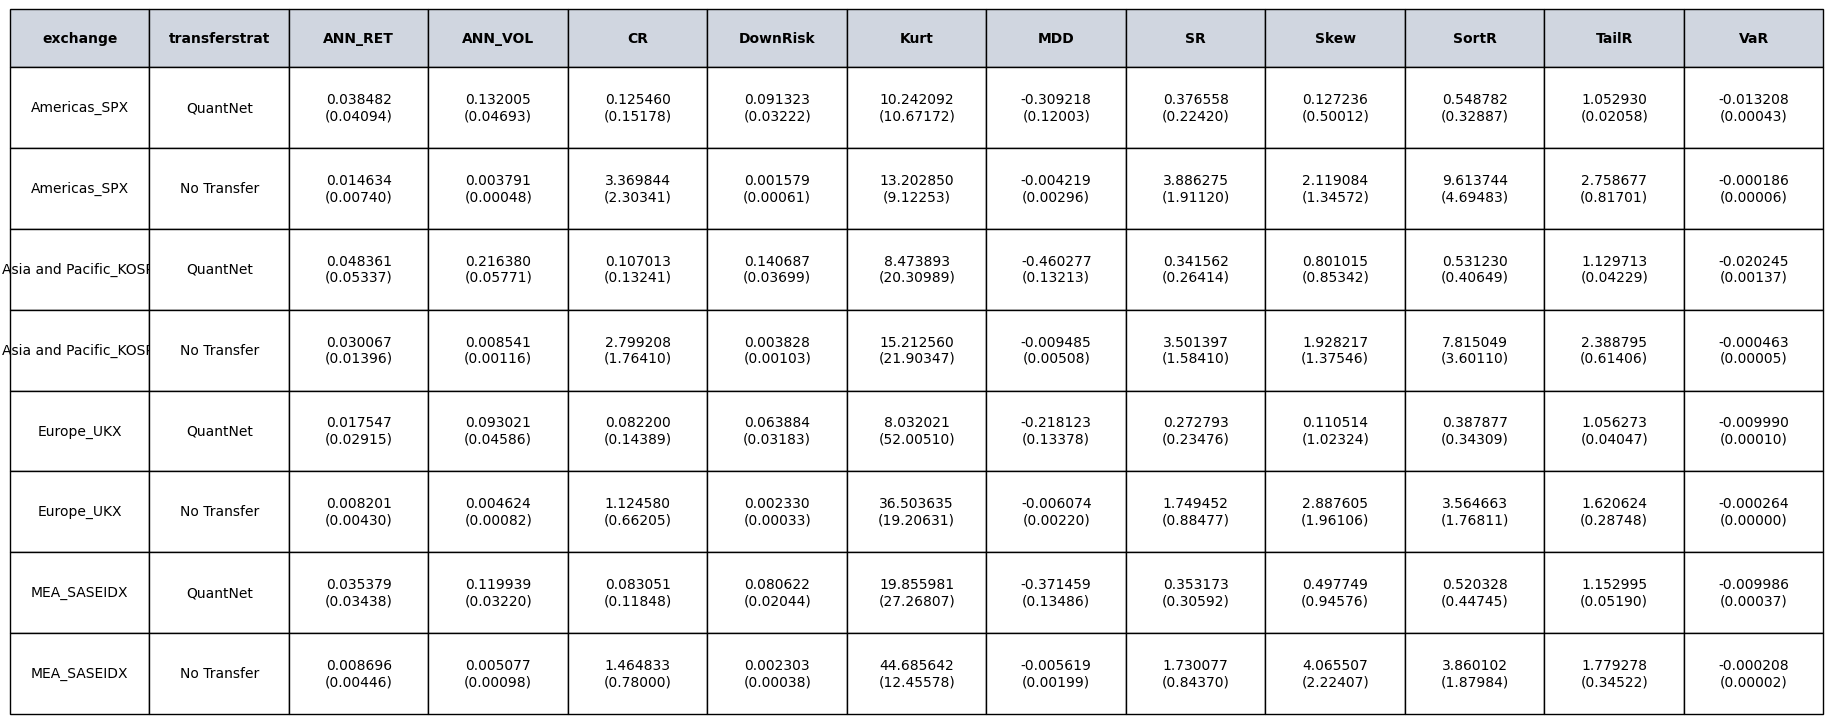

In [37]:
fig_b = draw_table(df=table_a4_b, upper_prefix="median", lower_prefix="mad")

### Table A1

In [38]:
df

,Unnamed: 0,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat,country
0,ABEV3 BS Equity,1.814130,2.151492,-0.291257,0.626638,0.291852,2.882295,0.183693,-0.034001,1.280420,0.155603,5.892951,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
1,BBAS3 BS Equity,1.962926,2.432544,-0.450468,1.095783,0.422541,3.230043,0.256782,-0.034001,1.280420,0.505638,5.188526,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
2,BBDC3 BS Equity,2.060505,2.474347,-0.372608,0.921962,0.346382,3.364621,0.212126,-0.034001,1.280420,0.432445,4.304384,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
3,BBDC4 BS Equity,2.008947,2.729678,-0.335485,0.915766,0.355081,3.309779,0.215525,-0.034001,1.280420,0.626201,5.328971,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
4,BRAP4 BS Equity,2.450775,3.759866,-0.414846,1.559767,0.420061,4.052500,0.254035,-0.034001,1.280420,0.182148,4.892425,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,SOL SJ Equity,0.043386,0.022420,-0.016510,0.000370,0.009588,0.061114,0.006806,-0.001096,1.128141,0.176572,9.699691,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212396,SPP SJ Equity,0.310746,0.246750,-0.020567,0.005075,0.016740,0.490055,0.010615,-0.001096,1.128141,2.499652,41.673329,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212397,TBS SJ Equity,-0.063373,-0.053357,-0.016728,-0.000893,0.012799,-0.086793,0.009345,-0.001096,1.128141,-1.081780,22.363524,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212398,TFG SJ Equity,0.612362,0.657872,-0.019217,0.012642,0.020869,1.255329,0.010180,-0.001096,1.128141,7.603496,126.320521,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa


In [39]:
import pandas as pd

# rename Unnamed: 0 → asset
df = df.rename(columns={"Unnamed: 0": "asset"})

# group by and calculate both counts
table_a1 = (
    df.groupby(["region", "exchange", "country"])
    .agg(
        **{
            "# Assets": ("asset", "nunique"),  # unique assets
            "# Samples": ("asset", "count"),  # total rows
        }
    )
    .reset_index()
)

table_a1

,region,exchange,country,# Assets,# Samples
0,Americas,Americas_IBOV,Brazil,29,2088
1,Americas,Americas_MERVAL,Argentina,10,720
2,Americas,Americas_MEXBOL,Mexico,13,936
3,Americas,Americas_RTY,United States,503,36216
4,Americas,Americas_SPTSX,Canada,108,7776
5,Americas,Americas_SPX,United States,352,25344
6,Asia and Pacific,Asia and Pacific_AS51,Australia,86,6192
7,Asia and Pacific,Asia and Pacific_FBMKLCI,Malaysia,22,1584
8,Asia and Pacific,Asia and Pacific_HSI,Hong Kong,37,2664
9,Asia and Pacific,Asia and Pacific_JCI,Indonesia,44,3168


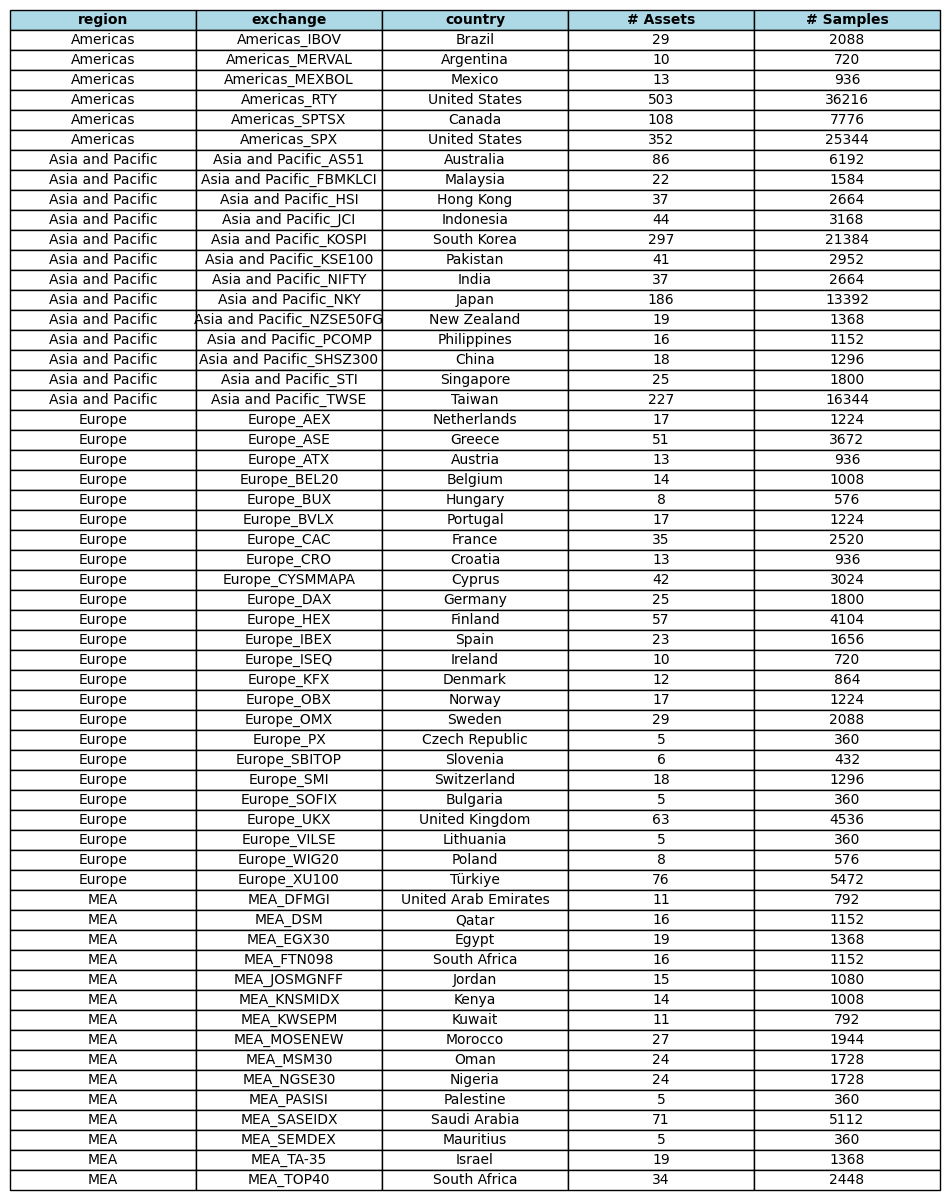

In [40]:
import matplotlib.pyplot as plt

# assume table_a1 is already created
fig, ax = plt.subplots(figsize=(8, 4))  # adjust figure size
ax.axis("off")  # hide axes

# draw table
tbl = ax.table(
    cellText=table_a1.values, colLabels=table_a1.columns, loc="center", cellLoc="center"
)

# adjust font size and scaling (col width, row height)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.2)

# style header row
for (row, col), cell in tbl.get_celld().items():
    if row == 0:  # header row
        cell.set_facecolor("lightblue")  # light gray background
        cell.set_text_props(weight="bold", color="black")

plt.show()

In [41]:
fig.savefig("table_a1.png")

### Figure A6

In [60]:
df

,asset,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt,exchange,region,set,transferstrat,country
0,ABEV3 BS Equity,1.814130,2.151492,-0.291257,0.626638,0.291852,2.882295,0.183693,-0.034001,1.280420,0.155603,5.892951,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
1,BBAS3 BS Equity,1.962926,2.432544,-0.450468,1.095783,0.422541,3.230043,0.256782,-0.034001,1.280420,0.505638,5.188526,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
2,BBDC3 BS Equity,2.060505,2.474347,-0.372608,0.921962,0.346382,3.364621,0.212126,-0.034001,1.280420,0.432445,4.304384,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
3,BBDC4 BS Equity,2.008947,2.729678,-0.335485,0.915766,0.355081,3.309779,0.215525,-0.034001,1.280420,0.626201,5.328971,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
4,BRAP4 BS Equity,2.450775,3.759866,-0.414846,1.559767,0.420061,4.052500,0.254035,-0.034001,1.280420,0.182148,4.892425,Americas_IBOV,Americas,train,1000_global_linear_linear,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,SOL SJ Equity,0.043386,0.022420,-0.016510,0.000370,0.009588,0.061114,0.006806,-0.001096,1.128141,0.176572,9.699691,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212396,SPP SJ Equity,0.310746,0.246750,-0.020567,0.005075,0.016740,0.490055,0.010615,-0.001096,1.128141,2.499652,41.673329,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212397,TBS SJ Equity,-0.063373,-0.053357,-0.016728,-0.000893,0.012799,-0.086793,0.009345,-0.001096,1.128141,-1.081780,22.363524,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa
212398,TFG SJ Equity,0.612362,0.657872,-0.019217,0.012642,0.020869,1.255329,0.010180,-0.001096,1.128141,7.603496,126.320521,MEA_TOP40,MEA,test,500_no_transfer_lstm,South Africa


In [61]:
figure_a6 = df[
    df["exchange"].isin(
        ["Europe_UKX", "Americas_SPX", "MEA_SASEIDX", "Asia and Pacific_KOSPI"]
    )
][["exchange", "transferstrat", "SR"]]
figure_a6 = figure_a6[
    figure_a6["transferstrat"].isin(
        ["1000_global_lstm_lstm", "1000_no_transfer_linear"]
    )
]
figure_a6["transferstrat"] = figure_a6["transferstrat"].replace(
    {"1000_global_lstm_lstm": "QuantNet", "1000_no_transfer_linear": "No Transfer"}
)
figure_a6.reset_index(drop=True, inplace=True)
figure_a6

,exchange,transferstrat,SR
0,Americas_SPX,QuantNet,0.340247
1,Americas_SPX,QuantNet,0.548845
2,Americas_SPX,QuantNet,0.781030
3,Americas_SPX,QuantNet,0.512808
4,Americas_SPX,QuantNet,0.503123
...,...,...,...
4693,MEA_SASEIDX,No Transfer,NaN
4694,MEA_SASEIDX,No Transfer,0.224111
4695,MEA_SASEIDX,No Transfer,-0.554931
4696,MEA_SASEIDX,No Transfer,0.436649


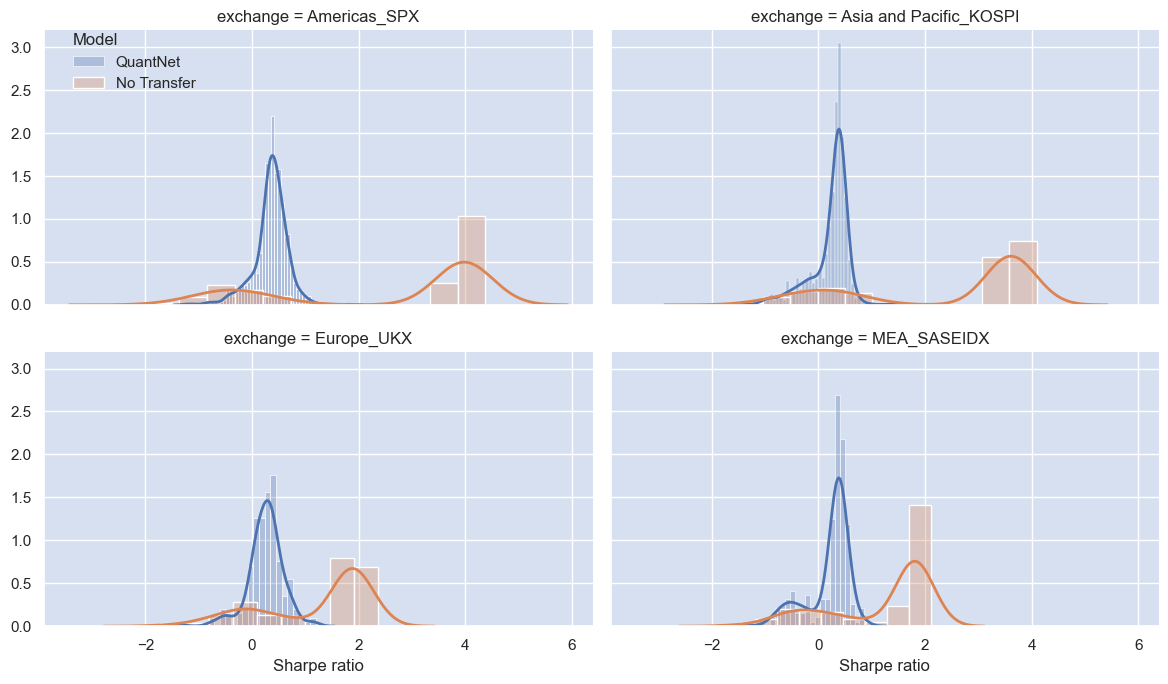

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


sns.set(style="darkgrid", rc={"axes.facecolor": "#d6e0f0"})  # background like yours

g = sns.FacetGrid(
    figure_a6,
    col="exchange",
    col_wrap=2,
    hue="transferstrat",
    sharex=True,
    sharey=True,
    height=3.5,
    aspect=1.5,
)

# Histogram with KDE
g.map(sns.histplot, "SR", stat="density", kde=False, alpha=0.3, multiple="layer")
g.map(sns.kdeplot, "SR", lw=2)

# Adjust legend → top-left
g.add_legend(title="Model", alignment="left")
g._legend.set_bbox_to_anchor((0.05, 0.95))  # x, y relative to figure
g._legend.set_loc("upper left")

# Titles and labels
for ax in g.axes.flat:
    ax.set_xlabel("Sharpe ratio")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [63]:
fig.savefig("figure_a6.png")

### Table A2

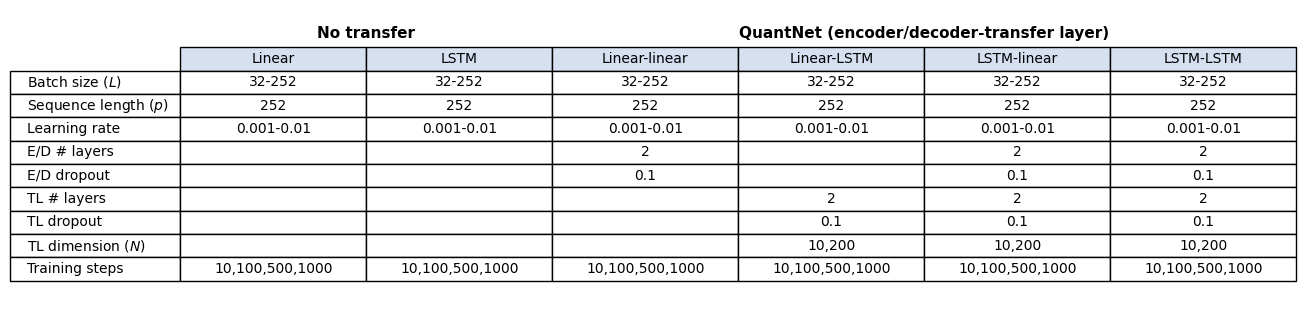

In [35]:
import matplotlib.pyplot as plt

# -------------------------
# Table Data
# -------------------------
col_labels = [
    ("No transfer", "Linear"),
    ("No transfer", "LSTM"),
    ("QuantNet (encoder/decoder-transfer layer)", "Linear-linear"),
    ("QuantNet (encoder/decoder-transfer layer)", "Linear-LSTM"),
    ("QuantNet (encoder/decoder-transfer layer)", "LSTM-linear"),
    ("QuantNet (encoder/decoder-transfer layer)", "LSTM-LSTM"),
]

row_labels = [
    "Batch size ($L$)",
    "Sequence length ($p$)",
    "Learning rate",
    "E/D # layers",
    "E/D dropout",
    "TL # layers",
    "TL dropout",
    "TL dimension ($N$)",
    "Training steps",
]

cell_text = [
    [
        "32-252",
        "32-252",
        "32-252",
        "32-252",
        "32-252",
        "32-252",
    ],
    ["252", "252", "252", "252", "252", "252"],
    [
        "0.001-0.01",
        "0.001-0.01",
        "0.001-0.01",
        "0.001-0.01",
        "0.001-0.01",
        "0.001-0.01",
    ],
    ["", "", "2", "", "2", "2"],
    ["", "", "0.1", "", "0.1", "0.1"],
    ["", "", "", "2", "2", "2"],
    ["", "", "", "0.1", "0.1", "0.1"],
    ["", "", "", "10,200", "10,200", "10,200"],
    [
        "10,100,500,1000",
        "10,100,500,1000",
        "10,100,500,1000",
        "10,100,500,1000",
        "10,100,500,1000",
        "10,100,500,1000",
    ],
]

# -------------------------
# Plot
# -------------------------
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis("off")

# Create table
table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=[cl[1] for cl in col_labels],  # use 2nd row (sub-labels)
    cellLoc="center",
    loc="center",
)

# -------------------------
# Header Styling
# -------------------------
# Color for 2nd header row
for col in range(len(col_labels)):
    table[0, col].set_facecolor("#d6e0f0")

# Add merged top headers manually
ax.text(
    0.1,
    0.9,
    "No transfer",
    ha="center",
    va="bottom",
    fontsize=11,
    weight="bold",
    transform=ax.transAxes,
)
ax.text(
    0.7,
    0.9,
    "QuantNet (encoder/decoder-transfer layer)",
    ha="center",
    va="bottom",
    fontsize=11,
    weight="bold",
    transform=ax.transAxes,
)

# Adjust scaling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

plt.show()

In [36]:
fig.savefig("table_a2.png")